<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0406_0407_Cov_layer_batchnormalization_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cov
#filter 32ro, 3x3짜리로 


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#Dataset download

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(X_train.shape)  #32x32채널이 3RGB영상이 50000개 있음
print(y_train.shape)  #각 영상 별 class 정보

(50000, 32, 32, 3)
(50000, 1)


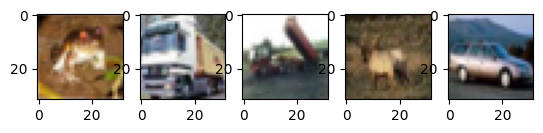

In [ ]:
f, axarr = plt.subplots(1,5)
for i in range(5):
  axarr[i].imshow(X_train[i, :, :, :])

  #32x32라서 화질이 좋지 않음

In [ ]:
print((y_train[:5])) #각각의 class 확인 

[[6]
 [9]
 [9]
 [4]
 [1]]


[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


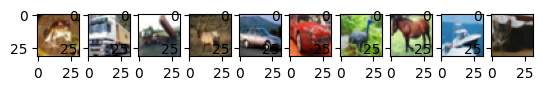

In [ ]:
f, axarr = plt.subplots(1,10)
for i in range(10):
  axarr[i].imshow(X_train[i, :, :, :])
  print((y_train[:10])) #각각의 class 확인 

In [ ]:
#데이터 전처리 float으로 casting후 나눠줌 
X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('float32')/255.0

In [ ]:
#model 생성
model = tf.keras.Sequential([
    layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(32,32,3)),
    layers.Conv2D(16,(3,3)), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16,(3,3)), activation = 'relu'),
    layers.Conv

])

In [ ]:
#model 생성
model = tf.keras.Sequential([
    layers.Conv2D(6, (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    #feature방향으로 다 더 해주는것 global average pooling 
    layers.Flatten(),
    layers.Dense(32, activation ='relu'),
    layers.Dense(10, activation ='softmax')

])

#Global Average Pooling 
#parameter가 너무 많아 overfitting이 되 ㄹ수 있는것을
#average pooling을 통해, 영상하나마다 demension을 1x1x1을 가져와서
#parameter를 줄임 

In [ ]:
#모델 컴파일
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#모델학습
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0311 - accuracy: 0.0997 - val_loss: 5342.3159 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 7.7522e-06 - accuracy: 0.1000 - val_loss: 6140.6802 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.4747e-06 - accuracy: 0.1000 - val_loss: 7421.6582 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 5.3485e-07 - accuracy: 0.1000 - val_loss: 9497.4580 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 5.6625e-08 - accuracy: 0.1000 - val_loss: 11416.6709 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4103e-08 - accuracy: 0.1000 - val_loss: 12737.1748 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 4.3984

KeyboardInterrupt: ignored

In [ ]:
#learnign rate가 너무 높으면(크면) -> 왔다갔다 하면서 수렴이 잘 안 됨 

#모델 컴파일
lr = 0.1
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#모델학습
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 9.6557e-10 - accuracy: 0.1000 - val_loss: 15073.1426 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 4.8875e-10 - accuracy: 0.1000 - val_loss: 15796.6133 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3126e-10 - accuracy: 0.1000 - val_loss: 16288.9844 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3113e-10 - accuracy: 0.1000 - val_loss: 16605.6074 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 9.0599e-11 - accuracy: 0.1000 - val_loss: 16975.6230 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 5.2452e-11 - accuracy: 0.1000 - val_loss: 17224.1406 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss

KeyboardInterrupt: ignored

In [ ]:
#learnign rate가 너무 높으면(크면) -> 왔다갔다 하면서 수렴이 잘 안 됨 

#모델 컴파일
lr = 0.01
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#모델학습

#learning rate가 작으면, ephoch을 늘려줘서 학습속도를 빠르게 함
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

In [ ]:
#학습이 안될 경우
#learning rate가 고려되었나? 
#model이 알맞은가? 
#모델의 복잡도를 올리거나, dense layer를 추가 한다. 

In [ ]:
#model 생성
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    #feature방향으로 다 더 해주는것 global average pooling 
    layers.Flatten(),
    #layers.Dense(32, activation ='relu'),
    layers.Dense(10, activation ='softmax')

])

In [ ]:
#0407 배치정규화(batch normalization)
#각 배치별로 나온 featrue값을 표준화 -> 평균을 뺴준 후, 표준편차로 나눔

#새로운 scale &Shift 적용 


In [ ]:
#model 생성 
#배치정규화는 -> Conv후에 넣어야 함 -> 이후 max pooling 
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape=]](32,32,3)),
    layers.BatchNormalization(), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.BatchNormalization(), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.BatchNormalization(), 
    layers.GlobalAveragePooling2D(),
    #feature방향으로 다 더 해주는것 global average pooling 
    layers.Flatten(),
    #layers.Dense(32, activation ='relu'),
    layers.Dense(10, activation ='softmax')

])

In [ ]:
"""model = tf.keras.Sequential([
  layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.BatchNormalization(),  #학습과정에서 데이터 분포가 불규칙해짐, 안정적인 학습에 방해 됨.->배치 정규화 후에 max pooling 
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),  
  layers.GlobalAveragePooling2D(),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])"""

In [ ]:
#learnign rate가 너무 높으면(크면) -> 왔다갔다 하면서 수렴이 잘 안 됨 

#모델 컴파일
lr = 0.02
model.compile(optimizer = ft.keras.optimizers.Adam(lr)
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
#모델학습
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_test, y_test))

In [ ]:
#데이터 선정, shape보고, DEA, 논의하기 